
 # <font color=#d20824 style="font-size:170%"><center>Investigation of listings in Copenhagen that use Airbnb primarily for renting out</center></font>

### <font color=#adb2bb>Social data analysis and visualization (02806)</font>
#### <font color=#adb2bb>Project Assignment B</font>
By Julie Fischer Vinther Christensen (s164519), Michael Thorbøll Kristensen (s180127) & Mie Frederiksen (s153631)

<hr style="border:0.5px solid gray"> </hr>

# <font color=#d20824>What is this project about?</font>

Check out the video to learn more. 

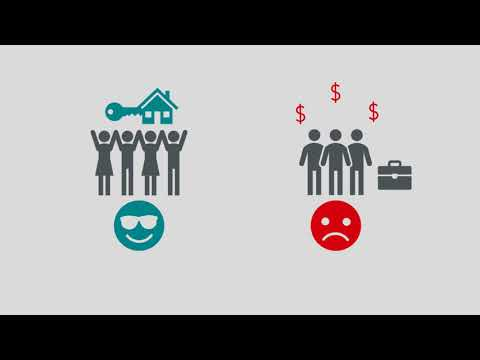

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9VESkBdX3rU",width=800, height=450) 

<hr style="border:0.5px solid gray"> </hr>

# <font color=#d20824>Prices of listings</font>

In [2]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import seaborn as sns
from colour import Color


from IPython.display import HTML, display
import pandas as pd
import numpy as np

from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
from IPython.display import Markdown
from ipywidgets import Layout

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime as dt
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing

from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, FactorRange, CDSView, Label, LabelSet, Range1d
from bokeh.palettes import GnBu3, OrRd3,Spectral6, RdBu3
from bokeh.plotting import figure, show,  output_file
output_notebook(hide_banner=True)

import os
import random
import folium

from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

from IPython.display import Image
from IPython.core.display import HTML 


df = pd.read_csv('listingsCPH.csv',low_memory=False)
df['host_since'] = pd.to_datetime(df['host_since'])

df.loc[df['neighbourhood_cleansed'] == 'Nrrebro', 'neighbourhood_cleansed'] = 'Nørrebro'
df.loc[df['neighbourhood_cleansed'] == 'sterbro', 'neighbourhood_cleansed'] = 'Østerbro'
df.loc[df['neighbourhood_cleansed'] == 'Amager st', 'neighbourhood_cleansed'] = 'Amager Øst'
df.loc[df['neighbourhood_cleansed'] == 'Brnshj-Husum', 'neighbourhood_cleansed'] = 'Brønshøj-Husum'
df.loc[df['neighbourhood_cleansed'] == 'Vanlse', 'neighbourhood_cleansed'] = 'Vanløse'

df['price'] = df['price'].str.replace(r',', '')
df['price'] = df['price'].str.replace(r'$', '')

df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace(r'%', '')

df = df.astype({'price': 'float','neighbourhood_cleansed': 'category'})

# Only take relevant attributes for this analysis. Add if neccessary 
dfc = pd.DataFrame (df, columns = ['last_review', 
                                   'neighbourhood_cleansed', 
                                   'host_name',
                                   'availability_365',
                                   'host_url',
                                   'listing_url',
                                   'latitude', 
                                   'longitude',
                                   'host_picture_url',
                                   'host_id',
                                   'id',
                                   'host_total_listings_count',
                                   'price', 
                                   'host_since',
                                   'room_type', 
                                   'maximum_nights',
                                   'minimum_nights',
                                   'calendar_last_scraped',
                                   'accommodates',
                                   'host_acceptance_rate',
                                   'reviews_per_month'
                                  ])



# The total sum af property types. 
Sum_P = len(dfc['room_type'])
Enti = len(dfc[(dfc['room_type'] == 'Entire home/apt')])
Priv = len(dfc[(dfc['room_type'] == 'Private room')])
Sha = len(dfc[(dfc['room_type'] == 'Shared room')])
hot = len(dfc[(dfc['room_type'] == 'Hotel room')])


# Create the right dataframe for this plot
dHomes = pd.DataFrame({'Propertytype': 'Property type',
                       'Entire Homes': (Enti/Sum_P)*100,
                        'Private Rooms': (Priv/ Sum_P)*100,
                       'Hotel Rooms': (hot/Sum_P)*100, 
                        'Shared Rooms': (Sha/Sum_P)*100}, index=[0])


#colors = ["#CAF1DE", "#E1F8DC","#FFE7C7", '#D3D3D3']    
colors = ["#5177F9", "#249605","#E83E0C", '#F4B22D']    

Cat =["Entire Homes","Private Rooms", "Shared Rooms", 'Hotel Rooms']

Propertytype = dHomes["Propertytype"]

x_label = "% of host listings" 

sourceDh = ColumnDataSource(dHomes)

pHomes = figure(y_range=Propertytype, plot_height=300, plot_width =900, x_axis_label = x_label, title="% of host listings by property Type",
           toolbar_location=None, tools="hover", tooltips="$name @$name%")

pHomes.hbar_stack(Cat, y='Propertytype', height=0.8, source=sourceDh, color=colors, 
             legend=[dict(value=["Entire Homes"]),dict(value=["Private Rooms"]), dict(value=["Shared Rooms"]), dict(value=["Hotel Rooms"])])

pHomes.legend.location = "top_left"
pHomes.legend.orientation = "vertical"
pHomes.xgrid.visible = False
pHomes.ygrid.visible = False

#pHomes.add_layout(labels)
#show(pHomes) 

size_beforeProp = len(dfc)
dfc = dfc[(dfc['room_type'] == 'Entire home/apt')]
size_afterProp = len(dfc)
#print(str(size_beforeProp-size_afterProp) + " rows are removed, these are hosts with property type private, shared or hotel rooms.")


chosen_attributes_price = ['id','price','last_review', 'neighbourhood_cleansed','host_total_listings_count', 'host_name','availability_365','host_url']


data_new_hosts_clean = dfc
size_before_Price = len(data_new_hosts_clean)
data_new_hosts_clean = data_new_hosts_clean.dropna(axis=0, subset=['price'])
size_after_Price = len(data_new_hosts_clean)
#print(str(size_before_Price-size_after_Price) + " na rows removed from data")


data_price = pd.DataFrame (data_new_hosts_clean, columns = chosen_attributes_price)


data_price = data_price.astype({'price': 'float','neighbourhood_cleansed': 'category'})
size_before_Price = len(data_price)
condition1 = data_price['price'] <= 5000
data_price_filter = data_price[condition1]
size_after_Price = len(data_price_filter)
#print(str(size_before_Price-size_after_Price) + " rows removed from data")


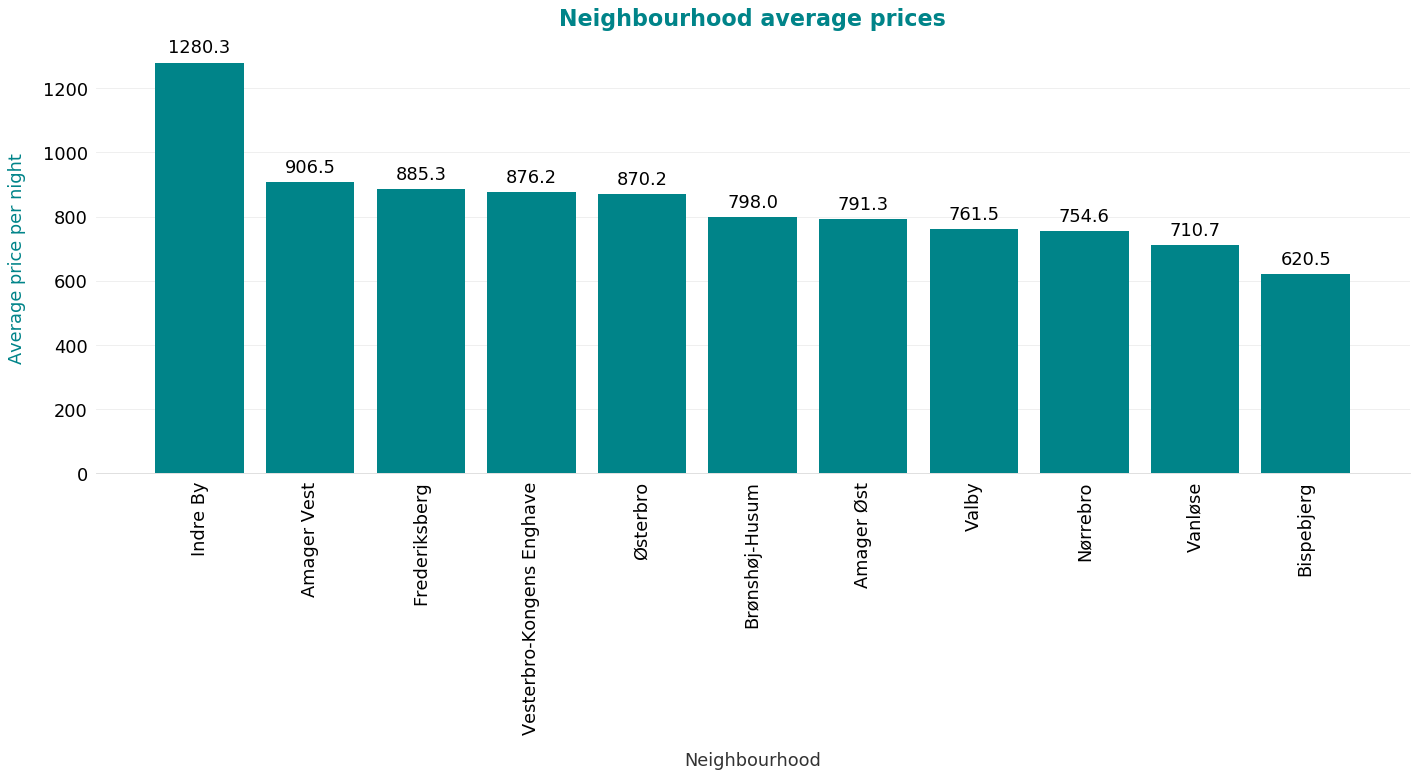

In [3]:

#fig =plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
#df.sort_values(by=['col1', 'col2'])
price_bar = data_price_filter[['price', 'neighbourhood_cleansed']].groupby('neighbourhood_cleansed').mean().sort_values(by=['price'],ascending=False)
# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(price_bar.size),
    height=price_bar['price'],
    color = "#008489",
#    tick_label=price_bar.index.strftime('%Y')
    tick_label=price_bar.index
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
                tick.label.set_rotation('vertical')

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 30.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color="#000000",
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Neighbourhood',fontsize=16, labelpad=15, color='#333333')
ax.set_ylabel('Average price per night',fontsize=16, labelpad=15, color='#008489')
ax.set_title('Neighbourhood average prices',fontsize=20, pad=15, color='#008489',
             weight='bold')
plt.tick_params(labelsize=16);

fig.tight_layout()

The most expensive neighbourhood is "Indre By" and that prices seem to decrease as the listing moves further away from the city centre - se for example "Vanløse". This is probably due to the fact that tourist are the most frequent users of Airbnb in Copenhagen and prefers to live close to the city center where the main attractions are located. They will therefore be willing to pay a higher price for the location.

If for instance a student has an appartment in 'Indre By' and rents it out for less than the median price, for 7 nights, this will result in an income larger than the monthly SU (state education grant).

<hr style="border:0.5px solid gray"> </hr>

# <font color=#d20824>Location of listings</font>

## Hover over map and scroll to zoom

In [4]:
# If there are any NA's, ignore these
heatdata = dfc.dropna(axis=0, subset=['latitude', 'longitude'])

map_CPHheat = folium.Map(location=[55.672163978, 12.568164394], 
                    zoom_start = 12,
                    tiles = "Stamen Terrain")

# Add a marker
folium.Marker([55.672163978, 12.568164394], popup='Copenhagen City Hall', icon=folium.Icon(color='lightgray', icon='building', prefix='fa')).add_to(map_CPHheat)

# Ensure the datatype is float
heatdata['latitude'] = heatdata['latitude'].astype(float)
heatdata['longitude'] = heatdata['longitude'].astype(float)

# List comprehension to make out list of lists
heatdata = [[row['latitude'],row['longitude']] for index, row in heatdata.iterrows()]

#gradient = {.40: '#F5F5DC', .66: '#ffeeed', 1: 'red'}
gradient = {.3: 'lightgreen', .5: 'yellow',0.7: 'orange', 0.80: 'red', 0.9: 'darkred'}

# Plot on the map
#HeatMap(heatdata, max_opacity=0.8, radius = 7, max_zoom=16, gradient=gradient).add_to(map_CPHheat)
HeatMap(heatdata, max_opacity=0.8, radius = 6.5, max_zoom=17, gradient=gradient).add_to(map_CPHheat)

# Display the map
map_CPHheat

As seen it the heat map above, there are some areas where the listings are more densely located than in other areas. In general, it seems like the number listings decrease as the distance to the city center (defined as city hall, see pin) increases. Except in Østerbro and Nørrebro area, where listings may not be close to city hall, but a located close to attractions such as 'Kastellet' and 'Nørrebro'. Additionally new construction areas in Copenhagen such as Sydhavnen, Islandsbrygge, Ørestad etc. seems to have a dense number of listings.

The map also reveals which areas of the city that people live, and which areas are used for other things such as parks (see for instance 'Botanisk Have') and Educational Institutions (see for instance Center for Sundhed og Samfund, CSS just southwest of 'Botanisk Have').

<hr style="border:0.5px solid gray"> </hr>

# <font color=#d20824>Who are they?</font>

Who are these people that rent out a place for business purposes? Watch the video below to learn more. 

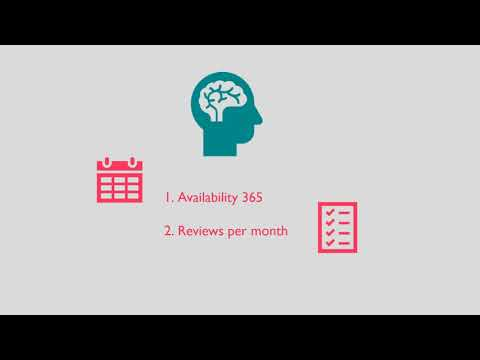

In [5]:
YouTubeVideo("OR66ASnbVf0",width=800, height=450)

<hr style="border:0.5px solid gray"> </hr>

# <font color=#d20824>Persona Map </font>

## Hover to see info - click to explore

In [6]:
# Should be host_since and host_id
chosen_attributes_host = ['host_since', 'host_id']

data_new_hosts_clean = df
size_before = len(data_new_hosts_clean)
data_new_hosts_clean = data_new_hosts_clean.dropna(axis=0, subset=chosen_attributes_host)
size_after = len(data_new_hosts_clean)
#print(str(size_before-size_after) + " na rows removed from data")

#data_new_hosts_clean.drop_duplicates(subset ="host_id", keep = 'first', inplace = True) 
data_new_hosts_clean = data_new_hosts_clean.drop_duplicates(['host_id']).reset_index(drop=True)

data_new_hosts = pd.DataFrame (data_new_hosts_clean, columns = chosen_attributes_host)

#Add a column with year
data_new_hosts['host_since_year'] = pd.DatetimeIndex(data_new_hosts['host_since']).year

agg_new_hosts = data_new_hosts.groupby(['host_since_year']).count()
agg_new_hosts = agg_new_hosts.iloc[:,0:1]

# Prepare for plotting
host_since_years = agg_new_hosts.index.to_numpy()
host_since_years = np.transpose(host_since_years)

# Prepare for plotting
host_since_count = agg_new_hosts.to_numpy()
l=host_since_count
flatten = lambda l: [item for sublist in l for item in sublist]
host_since_count = flatten(l)


host_since_running_total = np.cumsum(host_since_count)


# Remove listings with availability_365=0
size_beforeProp = len(dfc)
condition_availability = dfc['availability_365'] >= 1
dfc = dfc[condition_availability]
size_afterProp = len(dfc)
#print(str(size_beforeProp-size_afterProp) + " rows are removed, because listings have an availability_365 of zero .")

chosen_attributes = ['availability_365','reviews_per_month','host_total_listings_count']
dfc_copy = dfc
size_before = len(dfc_copy)
dfc_copy = dfc.dropna(axis=0, subset=chosen_attributes)
size_after = len(dfc_copy)
#print(str(size_before-size_after) + " na rows removed from data_cluster")

data_cluster = pd.DataFrame (dfc_copy, columns = chosen_attributes)


data_cluster_hist = data_cluster

scale_data = 1
if scale_data == 1:
    standard_scaler = preprocessing.StandardScaler()
    x_scaled = standard_scaler.fit_transform(data_cluster)
    data_cluster = pd.DataFrame(x_scaled,columns=chosen_attributes)
    
#data_cluster.head(5)


cluster_to_test = 10

wcss=[]

for i in range (1,cluster_to_test+1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_cluster)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    

K_clusters = 6

kmeans = KMeans(n_clusters=K_clusters, random_state=0,n_init=100).fit(data_cluster)

# Scale the data back for visuals
if scale_data == 1:
    x_scaled = standard_scaler.inverse_transform(data_cluster)
    data_cluster = pd.DataFrame(x_scaled,columns=chosen_attributes)
    
#data_cluster.head(5)

# Map the generated cluster labels to be sorted by cluster size to make sure same 
# cluster are output no matter which machine algoritm is run on
idx = np.argsort(kmeans.cluster_centers_[:,0])

lut = np.zeros_like(idx)
lut[idx] = np.arange(K_clusters)+1

#print('Cluster label mapping:')
#print(idx)
#print(lut)
# Append the sorted cluster labels
data_cluster['cluster'] = lut[kmeans.labels_]

#fig =plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')



tableau_colors = ['blue','orange','darkblue','red', 'purple', 'darkred','darkgreen','pink','lightblue','lightgreen','grey']


if scale_data == 1:
    # Scale the cluster centers back
    cluster_centers = standard_scaler.inverse_transform(kmeans.cluster_centers_)

for clus in range(1,K_clusters+1):
    label_cluster = 'Cluster ' + str(clus)

    
 #   plt.scatter(data_cluster.loc[data_cluster['cluster']==clus,
  #              x_axis_attr], data_cluster.loc[data_cluster['cluster']==clus,y_axis_attr], 
   #             s=40, c=tableau_colors[clus], label =label_cluster, alpha=0.6)

#plt.scatter(cluster_centers[:,x_axis_attr_index]
 #           ,cluster_centers[:,y_axis_attr_index], 
 #           s=150, c='deepskyblue', label ='Cluster centers',marker='o',edgecolors='b')

#plt.title('Clusters')
#plt.xlabel(x_axis_attr)
#plt.ylabel(y_axis_attr)
#plt.legend()

#plt.grid(color='b', linestyle='-', linewidth=0.1)


cluster_index_name = 'cluster_index'
count_in_cluster_name = 'count_in_cluster'


df_cluster_center = pd.DataFrame({ cluster_index_name : lut})

clusterCount = []
for item in df_cluster_center[cluster_index_name]:
    clusterCount.append(data_cluster.cluster.value_counts()[item])
    
df_cluster_center[count_in_cluster_name] = clusterCount

for num, attr in enumerate(chosen_attributes):
    df_cluster_center[attr] = cluster_centers[:,num]
    
    
# Define the clusters 
business_clusters = [3,4,5,6]
sharing_clusters = [1,2]

cluster1_name = 'Shared'
cluster2_name = 'Shared'
cluster3_name = 'Business: The Super Host'
cluster4_name = 'Business: The Flexible Host'
cluster5_name = 'Business: The King of the Hosts'
cluster6_name = 'Business: The Very Flexible Host'

data_cluster['cluster_name'] = 'no name given'
data_cluster.loc[(data_cluster.cluster == 1),'cluster_name']=cluster1_name
data_cluster.loc[(data_cluster.cluster == 2),'cluster_name']=cluster2_name
data_cluster.loc[(data_cluster.cluster == 3),'cluster_name']=cluster3_name
data_cluster.loc[(data_cluster.cluster == 4),'cluster_name']=cluster4_name
data_cluster.loc[(data_cluster.cluster == 5),'cluster_name']=cluster5_name
data_cluster.loc[(data_cluster.cluster == 6),'cluster_name']=cluster6_name



#Add the interpretation to the cluster data
data_cluster['Business'] = 'not classified'
data_cluster['Sharing'] = 'not classified'
data_cluster.loc[(data_cluster.cluster.isin(business_clusters)),'Business']='1'
data_cluster.loc[(data_cluster.cluster.isin(sharing_clusters)),'Business']='0'
data_cluster.loc[(data_cluster.cluster.isin(business_clusters)),'Sharing']='0'
data_cluster.loc[(data_cluster.cluster.isin(sharing_clusters)),'Sharing']='1'


dfc_with_clusters = pd.concat([dfc_copy.reset_index(drop=True),data_cluster.reset_index(drop=True)], axis=1)

# Remove duplicate rows created in the join
dfc_with_clusters = dfc_with_clusters.loc[:,~dfc_with_clusters.columns.duplicated()]


b_vs_s = dfc_with_clusters['Business'].value_counts()

#print("Number of listings in 'Shared' cluster: "+str(b_vs_s[0]))
#print("Number of listings in 'Business' cluster: "+str(b_vs_s[1]))


show_me = [3,4,5,6]

# Get data to map
mapData_clusters = dfc_with_clusters

#mapData_clusters = mapData_clusters[condition1]
mapData_clusters = mapData_clusters[mapData_clusters['cluster'].isin(show_me)]

###########################################################
# Start doing map stuff
###########################################################
map_CPH_clusters = folium.Map(location=[55.672163978, 12.568164394], 
                    zoom_start = 12,
                    tiles = "Stamen Terrain")

# Define which attribute to color the datapoints in the plot
gradient_attribute = 'cluster'

for ind in mapData_clusters.index: 
    # Calculate the marker color
    color_index = mapData_clusters[gradient_attribute][ind]
    cluster_color = tableau_colors[color_index]

    # Pop-ups
    url_listing = mapData_clusters['listing_url'][ind]
    url_host = mapData_clusters['host_url'][ind]
    html_host_img = """<img src="%s " height="120" width="120"/>""" % mapData_clusters['host_picture_url'][ind]

    # Markers
    folium.CircleMarker(
        location=[mapData_clusters['latitude'][ind], mapData_clusters['longitude'][ind]],
        radius=5,
        popup=folium.Popup('<a href="%s" target="_blank">Click to see listing</a>'% url_listing  +"<br>"
                           '<a href="%s" target="_blank">Click to see host</a>'% url_host+"<br>"
                           +html_host_img, max_width=500),
        color=cluster_color,
        fill=True,
        fill_color=None,
        tooltip =   "<b>Availability next 365 days: </b>"+str(mapData_clusters['availability_365'][ind])+"<br>"
                    "<b>Total listings for this host: </b>"+str(mapData_clusters['host_total_listings_count'][ind])+"<br>"
                    "<b>Reviews per month: </b>"+str(mapData_clusters['reviews_per_month'][ind])+"<br>"
                    "<b>Price per night: </b>"+str(mapData_clusters['price'][ind])+"<br>"
                    "<b>Host name: </b>"+str(mapData_clusters['host_name'][ind])+"<br>"
                    "<b>Business: </b>"+str(mapData_clusters['Business'][ind])+"<br>"
                    "<b>Cluster number: </b>"+str(mapData_clusters['cluster'][ind])+"<br>"
                    "<b>Cluster name: </b>"+str(mapData_clusters['cluster_name'][ind])+"<br>"
                    +html_host_img
    ).add_to(map_CPH_clusters)

legend_html =   '''
                <div style="position: fixed; 
                            top: 50px; right: 50px; width: 200px; height: 90px; 
                            border:0px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp;  <br>
                              &nbsp; <i class="fa fa-circle-o fa-2x" style="color:red"></i> &nbsp; The Super Host<br>
                              &nbsp; <i class="fa fa-circle-o fa-2x" style="color:purple"></i> &nbsp; The Flexible Host<br>
                              &nbsp; <i class="fa fa-circle-o fa-2x" style="color:darkred"></i> &nbsp; The King of the Hosts<br>
                              &nbsp; <i class="fa fa-circle-o fa-2x" style="color:darkgreen"></i> &nbsp The Very Flexible Host 
                </div>
                ''' 
map_CPH_clusters.get_root().html.add_child(folium.Element(legend_html))
map_CPH_clusters    
    
# Display the map
display(map_CPH_clusters)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-oe15{background-color:#ffffff;border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-mcqj{border-color:#000000;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-mcqj">The Super Host</th>
    <th class="tg-mcqj">The Flexible Host</th>
    <th class="tg-mcqj">The King of Hosts</th>
    <th class="tg-mcqj">The Very Flexible Host</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-oe15">Has several listings<br></td>
    <td class="tg-oe15">Very popular<br></td>
    <td class="tg-oe15">Few hosts that have many listings<br></td>
    <td class="tg-oe15"><span style="font-weight:400;font-style:normal">Very popular</span><br></td>
  </tr>
  <tr>
    <td class="tg-oe15">Does not use the listings as primary home</td>
    <td class="tg-oe15">Live in their apartments but are willing to move out to make extra money</td>
    <td class="tg-oe15">These hosts are Apartment in Copenhagen, Your Rental, Ira &amp; Moriya</td>
    <td class="tg-oe15"><span style="font-weight:400;font-style:normal">Live in their apartments but are willing to move out to make extra money</span></td>
  </tr>
  <tr>
    <td class="tg-oe15">Many guest per month</td>
    <td class="tg-oe15">Offer the opportunity to book the entire apartment often</td>
    <td class="tg-oe15">Firms that rent out apartments on the behalf of locals.</td>
    <td class="tg-oe15"><span style="font-weight:400;font-style:normal">Offer the opportunity to book the entire apartment </span><span style="font-weight:bold;font-style:normal">very</span><span style="font-weight:400;font-style:normal"> often</span></td>
  </tr>
  <tr>
    <td class="tg-oe15">Very high reviews</td>
    <td class="tg-oe15"></td>
    <td class="tg-oe15"></td>
    <td class="tg-oe15"></td>
  </tr>
</tbody>
</table>

## See elaborative descriptions of the personas below

**The Super Host**   
The overall characteristics of the Super Host are that he/she rent out often, have several listings and he/she is good at it! The Super Host is mostly located in the city center and near the central station. 

In [7]:
Image(url= "https://i.ibb.co/Rhvp4G0/superhost.png")

- **Background:** Frederik has lived in Copenhagen since 2009 and works at Winter Larsen Consult.  
- **Characteristics:** He describes his apartment as, *bright living room with fresh flowers, candles, danish design from HAY and a poster from one of my favourite movies called Step Brothers.*  In general, Frederik has a high availability with 3.63 review pr. month and 7 other listings.  
- **Qualitative assesment:** His apartment is stylish, minimalistic with no private belongings or photos, indicating that he normally don't live in the apartment himself.
- **Overall impression of reviews:** Overall the reviews are extremely positive, an example is: *Wonderful apartment - very charming, great amenities, comfortable and very convenient for public transport. The host was very welcoming and communicative.*  

**The Flexible Host**   
The Flexible Host is very popular. Hosts in this cluster are classified as a business based on their high availability. Many in this cluster seem to live in their apartments but are willing to move out when a booking is made to make extra money. One can argue that several of these hosts could be characterized as shared, but as they still offer the opportunity to book the entire apartment most of the year, they are considered, in this study, to be a business. The Flexible Host is popular in many districts in Copenhagen such as Frederiksberg, Vesterbro, Østerbro, Nørrebro, Islands Brygge and Indre by. Further, these listings also appear in the new construction areas such as Ørestad and Sydhavnen. 

In [8]:
Image(url= "https://i.ibb.co/zxBgS3N/flex.png")



- **Background:** Line is a mother and a wife, that loves adventures. She lives in Copenhagen and works as a graphic designer.  
- **Characteristics:** The price is over the average for the Frederiksberg Area.
- **Qualitative assesment:** It is a family-friendly apartment, stylish with big common areas and two bedrooms. Line seems to use this apartment as her primarily home, but seems to have another place to stay when guests arrive, such as a summerhouse or another apartment. 
- **Overall impression of reviews:** Line is known for her hospitality. *Great apartment in a great location, easy access to the city centre. The apartment is bigger than the photos, nice posh toiletries. Line was an excellent host*.

**The King of The Hosts**   
The King of The host is very few hosts that have many listings. More precise these hosts are Apartment in Copenhagen, Your Rental, Ira & Moriya. Your rental in Copenhagen is primarily located in the city center or in the new construction areas such as Ørestad and Nordhavnen. Apartment in Copenhagen is mostly located near the city center. Both Your Rental and Apartment in Copenhagen are firms that rent out apartments on the behalf of locals.

In [9]:
Image(url= "https://i.ibb.co/jDjmtnT/king.png")

- **Background:** Ira is married to Mariya they are living with their 7 children in the Swiss Alps. Ira has in total 213 listings distributed across the entire globe.
- **Characteristics:** They describe their apartment as a *Gorgeous hidden gem in Copenhagen*. 
- **Qualitative assesment:** Their apartment is luxury with good location and a capacity of 8 guests, this reflects the very high price. They have high availability and few reviews pr. month, indicating that they live from the few guests that are willing to pay the price.
- **Overall impression of reviews:** He is known to be an experienced host with 5 starts ratings in 90% of the reviews. *Clean, spacious apartment in a great location with attentive service! We had a lovely stay.*   

**The Very Flexible Host**   
The Very Flexible Host is similar to 'The Flexible Host' and has some of the same characteristics. This cluster differentiates from Cluster 4 in that these listings are even more available during the year.

In [10]:
Image(url= "https://i.ibb.co/ZzFstXC/veryflex.png")

- **Background:** Jacob is 37 and works in the media business. 
- **Characteristics:**  Jacobs apartment is a penthouse in a new building. The apartment is classy with two bedrooms.
- **Qualitative assesment:** Jacob has extremely high availability, few review pr. month and the price is way over the average of his neighbourhood. It seems like he does not use the apartment as his primary home.
- **Overall impression of reviews:** The guests thinks his place is spotlessly clean. *Very stylish, clean apartment. Excellent host, quick communication. Highly recommended!*

### <font color=#d20824> How many? </font>
According to this analysis, there are 384 listings that are used solely for renting out and 2226 listings that lies somewhere in between being used as a business and for sharing. 

#  <font color=#d20824><Center>Do you think this is a problem that needs legal attention from the danish parliament?</Center></font>

 <a href="https://nbviewer.jupyter.org/github/s153631/Final_Project/blob/master/Airbnb-Final-Version.ipynb">Link to the explainer Jupyter Notebook</a>

In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value=""></form>''')